### HousingPrice 


In [88]:
## Importing the require basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
## Importing the datasets.

data = pd.read_csv('C:/Users/square/Desktop/ML_Projects/Regression/Boston_Housing_Price_Complete/data.csv')

In [90]:
## Getting the info about the data.

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None


By looking at the above information, there are 506 datapoints but for variable['RM'] it is only 501 with 14 columns.It clearly 
show that some datapoints are missing from the dataset.

In [91]:
## Size of dataset.

data.shape

(506, 14)

In [92]:
## Viewing the data

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
## Statistical

data.describe(percentiles=[.005, .25, .45, .75, .85, .95, .99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
0.5%,0.012036,0.000000,1.215250,0.000000,0.392000,4.138000,6.357500,1.171778,1.000000,188.000000,12.810000,3.072500,2.237250,5.967500
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
45%,0.192742,0.000000,8.140000,0.000000,0.520000,6.142000,71.625000,2.857500,5.000000,307.000000,18.600000,390.210000,10.262500,20.400000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
85%,8.008308,28.000000,18.100000,0.000000,0.693000,6.943000,97.300000,6.267675,24.000000,666.000000,20.200000,396.900000,19.805000,31.025000


In [94]:
## Confirming to check any missing values.

data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [95]:
## Filling  the missing value.

mean = data['RM'].mean()
data['RM'].fillna(mean, inplace = True)

In [96]:
data['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [97]:
## Checking again  for missing value.

data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [98]:
## Separating 'X' & 'Y' variable.

X = data.drop(columns = ['MEDV'], axis = 1)
Y = data['MEDV']

print("X: ", X.shape)
print("Y: ", Y.shape)

X:  (506, 13)
Y:  (506,)


### Plotting

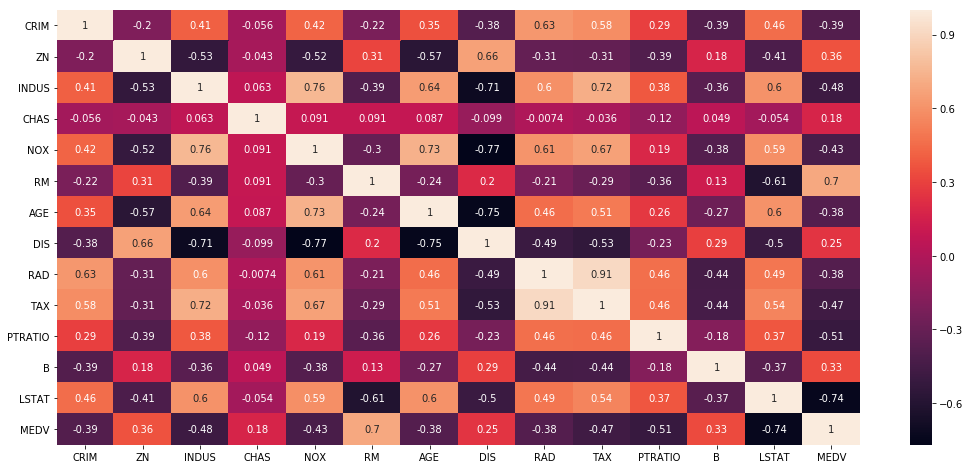

In [99]:
## Correlation Plot

import seaborn as sns
data_cor = data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(data_cor, annot = True)           

### Train & Test Splitting



In [102]:
## Dividing the data into training & testing by 75:30 ratio.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y, train_size = 0.75, random_state = 52)

## Printing the value.
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ", Y_test.shape)

X_train:  (379, 13)
Y_train:  (379,)
X_test:  (127, 13)
Y_test:  (127,)


C:\Users\square\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [103]:
## Building the model using Linear Regression techniques.

from sklearn.linear_model import LinearRegression

le = LinearRegression()
model_linear = le.fit(X_train, Y_train)
model_linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
## Intercept 

print("Intercept of model : ", model_linear.intercept_)
print("Coefficient of Model: ", list(model_linear.coef_))

Intercept of model :  35.1839723771883
Coefficient of Model:  [-0.07215326438697481, 0.03370506622044916, 0.028751304408645793, 0.49744151391502067, -14.797674492595192, 3.8158875462015454, -0.004137119827501341, -1.288851812610076, 0.2846501981335049, -0.014173197598650596, -0.9975606620577311, 0.010458525787181873, -0.4781122012956541]


In [105]:
## Prediction

pred_model = model_linear.predict(X_test)
pred_model

array([25.89053548, 19.33316157, 22.34149409, 25.18649598, 15.1365798 ,
       36.47397184, 28.85664541, 28.03009114, 11.85870901, 17.83649548,
       24.87297282, 14.05306273, 20.12103171, 28.09075286, 18.61173277,
       21.36817542, 37.98533296, 32.58806631, 18.87627565, 24.03842704,
       17.06510448, 32.48091427, 16.13102849, 20.55121664, 14.33556848,
       18.48404636, 10.15945425, 13.04735407,  6.9728925 , 15.47185467,
       17.97352633, 12.62015872, 13.41966151,  8.94645092, 27.78460661,
       34.96926638, 16.49600262, 26.48416448, 22.57087209, 22.28941309,
       15.26149284, 32.41639706, 20.73768099, 14.26161815, 30.82381512,
       32.61028366, 17.48291272, 30.80226979, 13.39931548, 21.8164459 ,
       19.28296598, 20.10916799, 11.90334015, 23.26513913, 26.45366073,
       19.61664208, 13.78384401,  6.90420566, 32.57401386, 32.15479141,
       20.59328874, 17.50284389, 20.61570749, 29.31949283, 28.35473926,
       25.08370799, 12.19306009, 24.56668326, 19.1944058 , 35.88

In [106]:
## Getting the accuracy score & checking how good our model is performing.

from sklearn.metrics import  r2_score

r_2 = r2_score(Y_test, pred_model)
print("R_Squared:", r_2)

R_Squared: 0.7641345862347416


In [113]:
## Checking for Overfitting.( Prediction for training dataset)

model_tr_pre = model_linear.predict(X_train)

## Getting the r2_squared value.
r_2_tr = r2_score(model_tr_pre, Y_train)
print("R_squared_tr :", r_2_tr)

R_squared_tr : 0.6052732379478679


The R2_squared value clearly reflecting that model is overfitting.

In [112]:
## Mean squared error

from sklearn.metrics import mean_squared_error
housing_predictions = model_linear.predict(X_test)
mse = mean_squared_error(Y_test, housing_predictions)
rmse = np.sqrt(mse)

##printing
print("Root Mean Squared Error :", rmse)

Root Mean Squared Error : 5.063863077886705


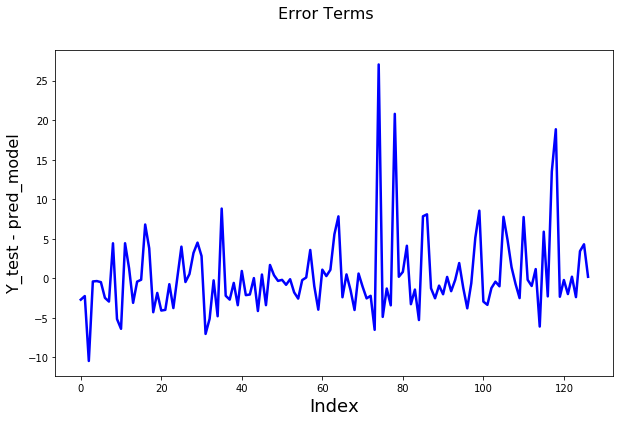

In [107]:
# Error terms are normally distributed with mean = 0.

c = [i for i in range(len(pred_model))]
fig = plt.figure(figsize = (10, 6), edgecolor="green")
plt.plot(c, Y_test - pred_model, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Y_test - pred_model', fontsize=16)                # Y-label
plt.show()

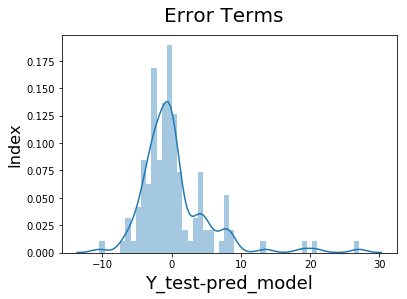

In [108]:
# Plotting the error terms to understand the distribution.

fig = plt.figure()
sns.distplot((Y_test-pred_model),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('Y_test-pred_model', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()